In [1]:
import graphviz as gv
import random

In [2]:
def randomG(n, m, directed=False, weighted=False, wrange=(1, 10)):
    if directed:
        edges = [(i, j) for i in range(n) for j in range(i, n) if i != j]
    else:
        edges = [(i, j) for i in range(n) for j in range(i+1, n)]
    random.shuffle(edges)
    G = [[] for _ in range(n)]
    for u, v in edges[:m]:
        if weighted:
            w = random.randint(*wrange)
            G[u].append((v, w))
            if not directed:
                G[v].append((u, w))
            continue
        G[u].append(v)
        if not directed:
            G[v].append(u)
    return G

randomG(10, 30, directed=True, weighted=True)

[[(1, 6), (7, 8), (4, 8), (2, 6), (3, 8), (8, 3), (5, 3)],
 [(2, 4), (6, 1), (5, 9), (3, 5), (9, 5), (4, 3)],
 [(5, 1), (9, 6)],
 [(7, 6), (6, 7), (8, 9)],
 [(5, 6), (8, 6), (6, 3), (7, 2)],
 [(6, 2), (9, 2), (8, 1)],
 [(7, 9), (9, 3), (8, 7)],
 [(8, 1)],
 [(9, 6)],
 []]

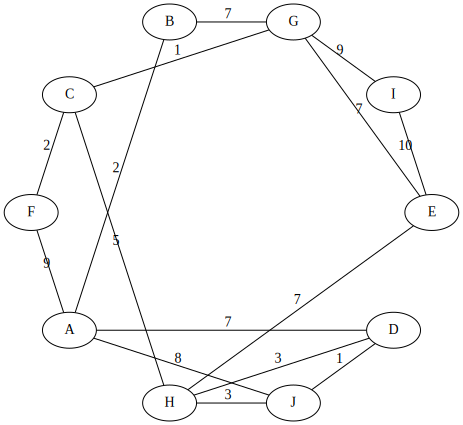

In [3]:
def showG(G, labels=None, directed=False, weighted=False, layout='circo'):
    dot = gv.Digraph("x") if directed else gv.Graph("y")
    dot.graph_attr['layout'] = layout
    n = len(G)
    for u in range(n):
        if labels:
            dot.node(str(u), labels[u])
        else:
            dot.node(str(u))
    edges = set()
    for u in range(n):
        if weighted:
            for v, w in G[u]:
                if directed:
                    dot.edge(str(u), str(v), str(w))
                    continue
                if f'{u},{v}' not in edges:
                    edges.add(f'{u},{v}')
                    edges.add(f'{v},{u}')
                    dot.edge(str(u), str(v), str(w))
            continue
        for v in G[u]:
            if directed:
                dot.edge(str(u), str(v))
                continue
            if f'{u},{v}' not in edges:
                edges.add(f'{u},{v}')
                edges.add(f'{v},{u}')
                dot.edge(str(u), str(v))

    return dot

showG(randomG(10, 15, weighted=True),
      labels='ABCDEFGHIJ', weighted=True)

In [4]:
def bfs(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n
    queue = [s]
    visited[s] = True
    while queue:
        u = queue.pop(0)
        for v in G[u]:
            if not visited[v]:
                visited[v] = True
                parents[v] = u
                queue.append(v)

    return parents

In [5]:
def dfs(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n

    def _dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parents[v] = u
                _dfs(v)

    _dfs(s)

    return parents

In [19]:
def dls(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n

    def _dls(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parents[v] = u
                _dfs(v)

    _dls(s)

    return parents

In [15]:
def lds (G,s,l):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n

    def _dfs(u,l):
        if l == 0:return #Cuando llega la profundidad a 0 se detiene
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parents[v] = u
                _dfs(v,l-1) #Al llamar recursivamente disminuimos la profundidad.

    _dfs(s,l)

    return parents

In [16]:
G = randomG(20,25)
lds(G,0,5)

[-1, 8, -1, 5, 11, 0, 5, 9, 16, 5, 15, 6, 15, 15, 5, 9, 9, 7, -1, 16]

In [18]:
def ids (G,s,target): #s start target el destino
    n = len(G)
    for limit in range(1 , n+1):
        path = lds(G,s,limit)
        if path[target] != -1:
            break
        return path, limit

In [32]:
G = randomG(15, 23)
showG(G)
print(ids(G,7,10))

None


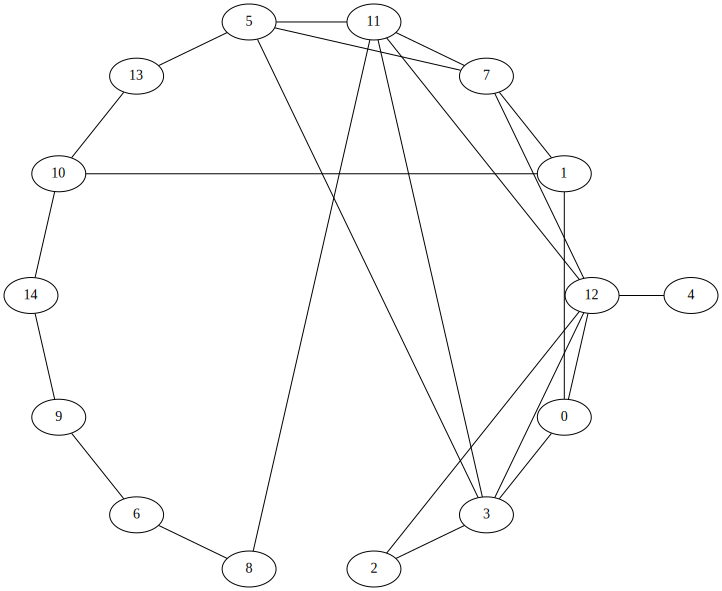

In [28]:
G = randomG(15, 23)
showG(G)

In [29]:
bfs(G, 0)

[-1, 0, 3, 0, 12, 3, 8, 12, 11, 14, 1, 3, 0, 5, 10]

In [30]:
dfs(G, 0)

[-1, 10, 12, 0, 12, 3, 8, 5, 11, 6, 14, 7, 11, 10, 9]